In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constants

absorptivity = 11.8e3 # cm^-1 M^-1 (measured in class by Prof.)
sample_vol = 0.006 # 6 mL -> 0.006 L
enzyme_amt = 2.0 * 0.4 / 0.006 * 0.001 # 2mg/mL * 0.4mL / 0.006L * 0.001L

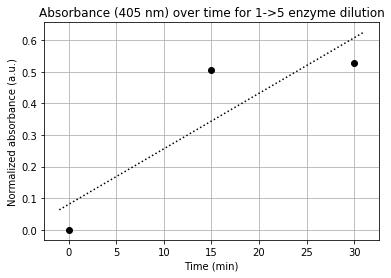

In [3]:
# Enzymatic concentration range-finding

# Dilution 1->5
time = np.array([0, 15, 30], dtype=np.float32) # minutes
abs_absptn = np.array([0.794, 1.300, 1.320], dtype=np.float32) # absorbtion
rel_absptn = abs_absptn - abs_absptn[0]

fit = np.polyfit(time, rel_absptn, 1)
fit_fn = np.poly1d(fit)
tt = np.linspace(time[0]-1,time[-1]+1,10)

plt.close()
plt.figure(figsize=(6.0,4.0))

plt.plot(time, rel_absptn, 'ko')
plt.plot(tt, fit_fn(tt), 'k:')

plt.title('Absorbance (405 nm) over time for 1->5 enzyme dilution')
plt.xlabel('Time (min)')
plt.ylabel('Normalized absorbance (a.u.)')

plt.gca().grid(True)

plt.gcf().set_facecolor('white')
plt.gcf().savefig('range_finding.png')

plt.show()

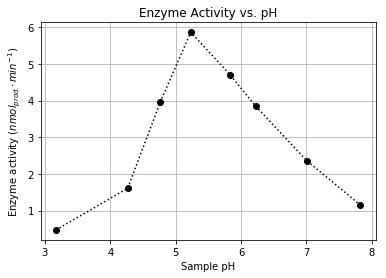

In [4]:
# Enzyme activity vs. pH

sample_pH = np.array([
    3.170,
    4.267,
    4.767,
    5.232,
    5.830,
    6.225,
    7.011,
    7.827
])

t0_absorbance = np.array([
    0.010,
    0.007,
    0.005,
    -0.037,
    -0.035,
    -0.031,
    -0.032,
    -0.044
])

t30_absorbance = np.array([
    0.038,
    0.102,
    0.239,
    0.309,
    0.243,
    0.196,
    0.107,
    0.024
])

nmlz_abs = t30_absorbance - t0_absorbance
prod_conc = nmlz_abs / absorptivity # product concentration in mol/L (M)
enz_activ = prod_conc * sample_vol / 30 # enzyme activity in mol(prod)/min

plt.close()
plt.figure(figsize=(6.0,4.0))

plt.plot(sample_pH, enz_activ * 1e9, 'ko:') # plot rate in uM/min

plt.title('Enzyme Activity vs. pH')
plt.xlabel('Sample pH')
plt.ylabel('Enzyme activity ($nmol_{prod} \cdot min^{-1}$)')

plt.gca().grid(True)

plt.gcf().set_facecolor('white')
plt.gcf().savefig('pH_optimum.png')

plt.show()

In [5]:
opt_pH_idx = 3 # array index of the optimum pH
print('Enzyme activity at optimum: {:f} nmol * min^-1'.format(enz_activ[opt_pH_idx] * 1e9))
print('Specific activity at optimum: {:f} nmol * min^-1 * mg^-1'.format(1e9 * enz_activ[opt_pH_idx]/enzyme_amt))

Enzyme activity at optimum: 5.864407 nmol * min^-1
Specific activity at optimum: 43.983051 nmol * min^-1 * mg^-1


In [6]:
print(fit[0]**2) # R-squared of absorbance v. time for 1->5 enz dilution

0.00030741780453152185


In [7]:
print('Absorbance: {:f}'.format(nmlz_abs[opt_pH_idx]))

# molar conc * 1e6 umol/mol
print('Conc product (uM): {:f}'.format(prod_conc[opt_pH_idx] * 1e6))

# molar concentration * molar mass * 1e3 mg/g
print('Conc product (mg): {:f}'.format(prod_conc[opt_pH_idx] * 139.110 * 1e3))

# molar conc * sample vol * 1e9 nanomol/mol
print('nanomoles product: {:f}'.format(prod_conc[opt_pH_idx] * sample_vol * 1e9))

Absorbance: 0.346000
Conc product (uM): 29.322034
Conc product (mg): 4.078988
nanomoles product: 175.932203
